In [1]:
import psychopy.filters
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from PIL import ImageDraw
import os

pygame 2.0.1 (SDL 2.0.14, Python 3.7.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
max_val = 256

# 同じ階層に画像を保存するためのフォルダを作成します。
new_dir_path = 'check_not_butter'+str(max_val)
try:
    os.makedirs(new_dir_path)
except FileExistsError:
    print('フォルダーが既に存在したためスルーしました')

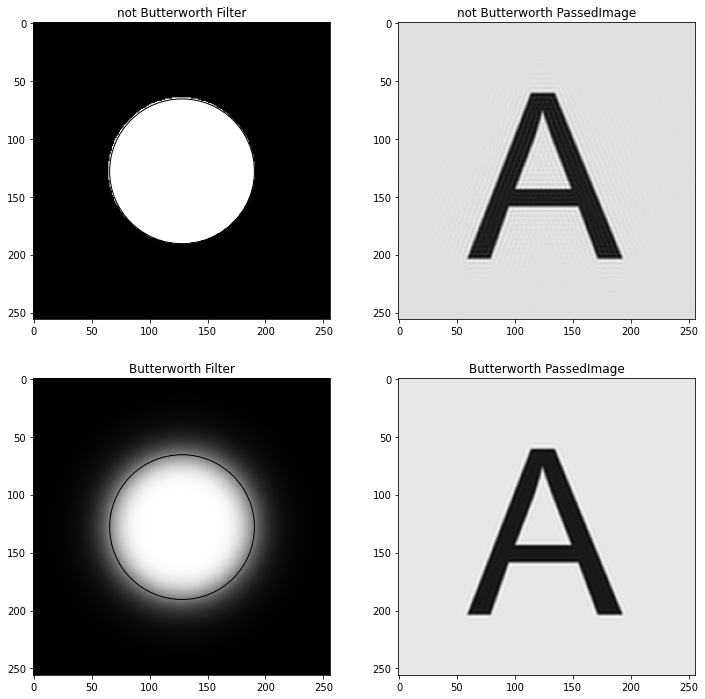

In [16]:
# フィルタを適用するアルファベットを指定します。
char = "A"
original_image = "../修論実験/Images/"+char+"256.png"
shifted_f_uv = img_shiftedFuv(original_image)

# ここを変更してください。
val = 125

# フィルタを適用した画像を保存するpathを決めてます。
not_butter_file_path = new_dir_path + "/"+char+"256_not_Images_"+str(val)+".png"
butter_file_path = new_dir_path + "/"+char+"256_Butter_Images_"+str(val)+".png"

filter_Image_list = filter_passedImage(shifted_f_uv, val)
# filter_Image_listには、インデックス：０から 
# [もう一つのフィルタの画像, もう一つのフィルタを適用した画像, バタワースフィルタの画像, バタワースフィルタを適用した画像]

# 適用した画像のみを保存してます。
plt.imsave(not_butter_file_path, filter_Image_list[1])
plt.imsave(butter_file_path, filter_Image_list[3])

# 確認のためにjupyter notebookに表示しました。
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes[0,0].imshow(filter_Image_list[0], cmap='gray')
axes[0,0].set_title('not Butterworth Filter')

#　カットオフ周波数を円で表示しています。
draw_circle = plt.Circle((max_val/2, max_val/2), val/2, fill=False)
axes[0,0].add_artist(draw_circle)

axes[0,1].imshow(filter_Image_list[1], cmap='gray')
axes[0,1].set_title('not Butterworth PassedImage')

axes[1,0].imshow(filter_Image_list[2], cmap='gray')
axes[1,0].set_title('Butterworth Filter')

#　カットオフ周波数を円で表示しています。
draw_circle = plt.Circle((max_val/2, max_val/2), val/2, fill=False)
axes[1,0].add_artist(draw_circle)

axes[1,1].imshow(filter_Image_list[3], cmap='gray')
axes[1,1].set_title('Butterworth PassedImage')
plt.show()

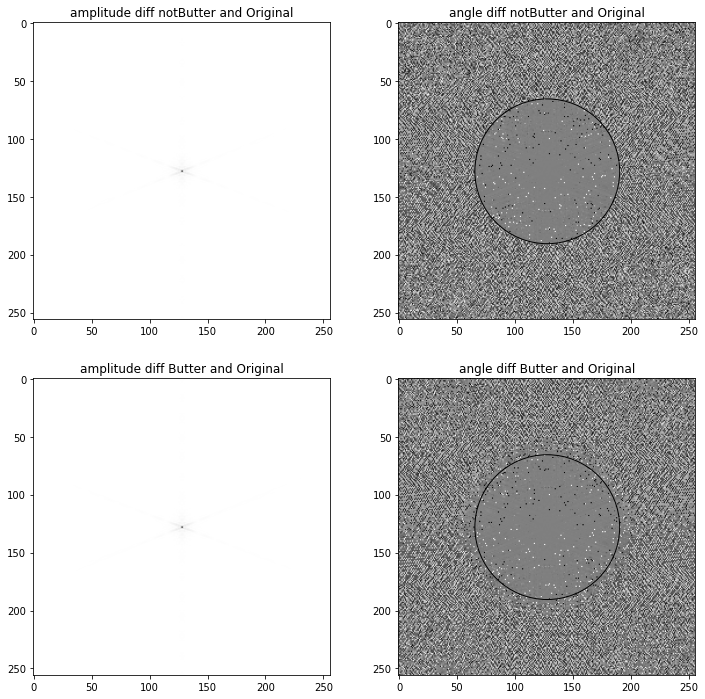

In [17]:
# もう一方のフィルタを適用した時の振幅と位相を取得しています。
notB_filtered_amplitude, notB_filtered_ang = Spectrum_Phase(not_butter_file_path)
# バタワースフィルタを適用した時の振幅と位相を取得しています。
Butter_filtered_amplitude, Butter_filtered_ang = Spectrum_Phase(butter_file_path)
# 元画像の振幅と位相を取得しています。
original_amplitude, original_ang = Spectrum_Phase(original_image)

# もう一方のフィルタと元画像の差分を抽出しています。
# 振幅の差分です。
amplitude_diff_notB = notB_filtered_amplitude - original_amplitude
# 位相の差分です。
ang_diff_notB = notB_filtered_ang - original_ang

# バタワースフィルタと元画像の差分を抽出しています。
# 振幅の差分です。
amplitude_diff_Butter = Butter_filtered_amplitude - original_amplitude
# 位相の差分です。
ang_diff_Butter = Butter_filtered_ang - original_ang


# 確認のためにjupyter notebookに表示しました。
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes[0,0].imshow(amplitude_diff_notB, cmap='gray')
axes[0,0].set_title('amplitude diff notButter and Original')

axes[0,1].imshow(ang_diff_notB , cmap='gray')
axes[0,1].set_title('angle diff notButter and Original')
draw_circle = plt.Circle((max_val/2, max_val/2), val/2, fill=False)
axes[0,1].add_artist(draw_circle)

axes[1,0].imshow(amplitude_diff_Butter, cmap='gray')
axes[1,0].set_title('amplitude diff Butter and Original')

axes[1,1].imshow(ang_diff_Butter, cmap='gray')
axes[1,1].set_title('angle diff Butter and Original')
draw_circle = plt.Circle((max_val/2, max_val/2), val/2, fill=False)
axes[1,1].add_artist(draw_circle)

plt.show()

In [18]:
# この関数は使ってないです。
# オリジナル画像のパワースペクトルもしくは位相を半径１毎に足し合わせてグラフ化します
def radius_1_original_sum(original):
    import math
    unit_num , element_num = original.shape
    
    # originは原点の意味です。
    origin_x = unit_num/2
    origin_y = element_num/2
    
    # もっとも遠い点（０、０）と原点の距離を計算して、グラフのyにあたるリストを初期化してます
    max_distance_sqrt = (0 - origin_x)**2 + (0 - origin_y)**2
    max_distance = round(math.sqrt(max_distance_sqrt)) + 1
    n = [0 for k in range(max_distance)]
    
    #　原点からの距離を計算して、距離に相当するyに値を入力してます。入力する際に絶対値をとっています。
    for i in range(unit_num):
        for j in range(element_num):
            # 距離の計算です。
            distance_to_origin_sqrt = (i - origin_x)**2 + (j - origin_y)**2
            distance_to_origin = math.sqrt(distance_to_origin_sqrt)
            
            # 小数点以下を四捨五入しています。
            distance_int = round(distance_to_origin)
            
            n[distance_int] += abs(original[i][j])
    
    x = [i for i in range(len(n))]
    plt.plot(x, n, c="gray")
    plt.show()
    
    return x, n

In [19]:
# このセルも使ってないです。
original_amplitude, original_ang = Spectrum_Phase(original_image)

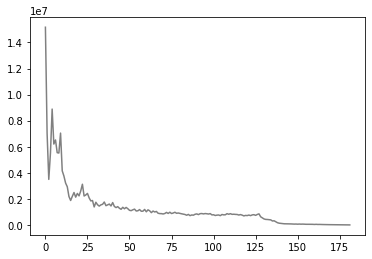

In [20]:
# このセルも使ってないです。
original_sum_x = [0]
original_sum_y = [0]
original_sum_x,original_sum_y = radius_1_original_sum(original_amplitude)

In [22]:
# ローパスフィルタにかけた画像とオリジナル画像の、振幅もしくは位相の差分を半径１つごとに足し合わせてグラフ化します
# 元画像に対する百分率で出力します。
def radius_1_per_diff(original, Passed):
    """
        original : オリジナル画像のパワースペクトルもしくは位相
        Passed : ローパスフィルタにかけた画像のパワースペクトルもしくは位相
    """
    import math
    diff = original - Passed
    unit_num , element_num = diff.shape
    
    # originは原点の意味です。
    origin_x = unit_num/2
    origin_y = element_num/2
    
    # もっとも遠い点（０、０）と原点の距離を計算して、グラフのyにあたるリストを初期化してます
    max_distance_sqrt = (0 - origin_x)**2 + (0 - origin_y)**2
    # 最後の＋１はエラーを起こさないためのバッファーです。
    max_distance = round(math.sqrt(max_distance_sqrt)) + 1
    
    n = [0 for k in range(max_distance)]
    original_sum = [0 for k in range(max_distance)]
    
    # オリジナル画像の位相もしくは振幅の絶対を取っています。割合を計算する時の分母として利用します。
    for i in range(unit_num):
        for j in range(element_num):
            distance_to_origin_sqrt = (i - origin_x)**2 + (j - origin_y)**2
            distance_to_origin = math.sqrt(distance_to_origin_sqrt)
            distance_int = round(distance_to_origin)
            original_sum[distance_int] += abs(original[i][j])
    
    #　原点からの距離を計算して、距離に相当するyに値を入力してます。入力する際に絶対値をとっています。
    for i in range(unit_num):
        for j in range(element_num):
            distance_to_origin_sqrt = (i - origin_x)**2 + (j - origin_y)**2
            distance_to_origin = math.sqrt(distance_to_origin_sqrt)
            distance_int = round(distance_to_origin)
            n[distance_int] += abs(diff[i][j])
            
    # 百分率に変換しています。
    for i in range(len(original_sum)):
        n[i] = n[i]*100/original_sum[i]
    
    x = [i for i in range(len(n))]
    plt.plot(x, n, c="gray")
    plt.vlines(val/2, 0, 100, colors= "red")
    plt.show()

In [23]:
notB_filtered_amplitude, notB_filtered_ang = Spectrum_Phase(not_butter_file_path)
Butter_filtered_amplitude, Butter_filtered_ang = Spectrum_Phase(butter_file_path)
original_amplitude, original_ang = Spectrum_Phase(original_image)

angle difference between original and Butter


/Users/okadamasayuki/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars


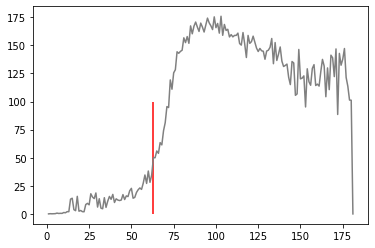

angle difference between original and Another Filter


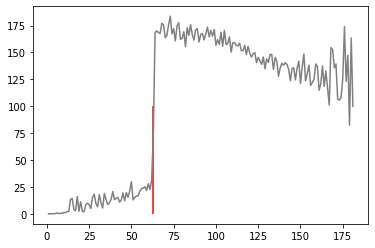

amplitude difference between original and Butter


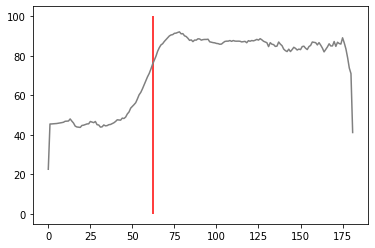

amplitude difference between original and Another Filter


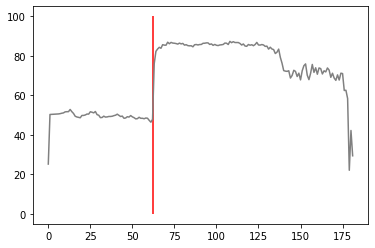

In [24]:
print("angle difference between original and Butter")
radius_1_per_diff(original_ang, Butter_filtered_ang)

print("angle difference between original and Another Filter")
radius_1_per_diff(original_ang, notB_filtered_ang)

print("amplitude difference between original and Butter")
radius_1_per_diff(original_amplitude, Butter_filtered_amplitude)

print("amplitude difference between original and Another Filter")
radius_1_per_diff(original_amplitude, notB_filtered_amplitude)

In [25]:
def img_shiftedFuv(img_file):
    img = Image.open(img_file)
    gray_img = img.convert('L')
    f_xy = np.asarray(gray_img)
    f_uv = np.fft.fft2(f_xy)
    shifted_f_uv = np.fft.fftshift(f_uv)
    return shifted_f_uv

In [6]:
# これ使ってないです。
def filter_passedImage_only_notButter(shifted_f_uv, val, save_file, save_filter):    
    filter_not_butter = make_filer(val/512, shifted_f_uv)
    filtered_f_uv_not_butter = np.multiply(shifted_f_uv, filter_not_butter)
    unshifted_f_uv_not_butter = np.fft.fftshift(filtered_f_uv_not_butter)
    i_f_xy_not_butter = np.fft.ifft2(unshifted_f_uv_not_butter).real
    
    filter_Image_list = []
    filter_Image_list.append(filter_not_butter)
    filter_Image_list.append(i_f_xy_not_butter) 
    
    return filter_Image_list

In [14]:
# フィルタを作成して、適用した画像をリストで返します。
def filter_passedImage(shifted_f_uv, val):
    ###　バタワースフィルタ
    butter_filter = psychopy.filters.butter2d_lp(
        size=(256,256),
        cutoff=val/512,
        n=4)
    filtered_f_uv = np.multiply(shifted_f_uv, butter_filter)
    unshifted_f_uv = np.fft.fftshift(filtered_f_uv)
    i_f_xy_butter = np.fft.ifft2(unshifted_f_uv).real
    ###
    
    ###　もう一方のフィルタ
    filter_not_butter = make_filter(val/512, shifted_f_uv)
    filtered_f_uv_not_butter = np.multiply(shifted_f_uv, filter_not_butter)
    unshifted_f_uv_not_butter = np.fft.fftshift(filtered_f_uv_not_butter)
    i_f_xy_not_butter = np.fft.ifft2(unshifted_f_uv_not_butter).real
    ###
    
    filter_Image_list = []
    filter_Image_list.append(filter_not_butter)
    filter_Image_list.append(i_f_xy_not_butter) 
    filter_Image_list.append(butter_filter)
    filter_Image_list.append(i_f_xy_butter) 
    
    return filter_Image_list

In [15]:
# もう一方のローパスフィルタを作成する関数です。
def make_filter(ellipse_percentage, shifted_f_uv):
    # フィルタ (ローパス) を用意する
    x_pass_filter = Image.new(mode='L',  # 8-bit pixels, black and white
                              size=(shifted_f_uv.shape[0],
                                    shifted_f_uv.shape[1]),
                              color=0,  
                              )
    # 中心に円を描く
    draw = ImageDraw.Draw(x_pass_filter)
    # 円の半径
    ellipse_r = shifted_f_uv.shape[0] * ellipse_percentage
    # 画像の中心
    center = (shifted_f_uv.shape[0] // 2,
              shifted_f_uv.shape[1] // 2)
    # 円の座標
    ellipse_pos = (center[0] - ellipse_r,
                   center[1] - ellipse_r,
                   center[0] + ellipse_r,
                   center[1] + ellipse_r)
    draw.ellipse(ellipse_pos, fill=255)
    # フィルタ
    filter_array = np.asarray(x_pass_filter)    
    return filter_array

In [9]:
# 今回は使ってないです。
def make_HighFilter(ellipse_percentage, shifted_f_uv):
    # フィルタ (ローパス) を用意する
    x_pass_filter = Image.new(mode='L',  # 8-bit pixels, black and white
                              size=(shifted_f_uv.shape[0],
                                    shifted_f_uv.shape[1]),
                              color=255,  # default black
                              )
    # 中心に円を描く
    draw = ImageDraw.Draw(x_pass_filter)
    # 円の半径
    ellipse_r = shifted_f_uv.shape[0] * ellipse_percentage
    # 画像の中心
    center = (shifted_f_uv.shape[0] // 2,
              shifted_f_uv.shape[1] // 2)
    # 円の座標
    ellipse_pos = (center[0] - ellipse_r,
                   center[1] - ellipse_r,
                   center[0] + ellipse_r,
                   center[1] + ellipse_r)
    draw.ellipse(ellipse_pos, fill=0)
    # フィルタ
    filter_array = np.asarray(x_pass_filter)    
    return filter_array

In [10]:
# 振幅と位相を出力する
def Spectrum_Phase(filename):
    """
        filename：入力画像
    """
    
    # 画像を読み込む
    img = Image.open(filename)
    # グレイスケールに変換する
    gray_img = img.convert('L')
    # NumPy 配列にする
    f_xy = np.asarray(gray_img)

    # 2 次元高速フーリエ変換で周波数領域の情報を取り出す
    f_uv = np.fft.fft2(f_xy)
    # 画像の中心に低周波数の成分がくるように並べかえる
    shifted_f_uv = np.fft.fftshift(f_uv)

    # パワースペクトルに変換する
    amplitude = np.absolute(shifted_f_uv)
    ang = np.angle(shifted_f_uv)

    return amplitude, ang